In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install sktime matplotlib seaborn

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn

from hmmlearn.hmm import GaussianHMM
from sklearn.neural_network import BernoulliRBM

In [4]:
def fitHMM(vals, n_states):
    # Reshape the array of measurements
    vals = np.reshape(np.vstack((vals)).reshape((-1,), order='F'),[len(vals[0]),len(vals)])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=500).fit(vals)
     
    # classify each observation as one of the n_states
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    return (hidden_states, mus, sigmas, transmat, model)

def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year)')
    ax1.set_ylabel('Nile river flow',         color=color)
    for vals in ts_vals:
        ax1.plot(time_vals, vals)
    ax1.tick_params(axis='y',            labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'k'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

In [37]:
import csv
import os

data = pd.read_pickle('~/code/sandbox/python/wgta_conversion/combined/ARC06/ARC06.ts')
data.head()

channels = ['N2_TANKS_PRESS', 'THRUSTERS_FEED_PRESS', 'ED01_PRESS', 'ED02_PRESS', 'ED03_PRESS', 'EGC_PRESS', 'N2_CTRL_VALVE_FEED_PRESS', 'N2_PROP_TANKS_FEED_PRESS', 'PROP_TANKS_PRESS']
channels = ['N2_TANKS_PRESS', 'THRUSTERS_FEED_PRESS', 'EGC_PRESS', 'N2_CTRL_VALVE_FEED_PRESS', 'N2_PROP_TANKS_FEED_PRESS', 'PROP_TANKS_PRESS']

subset = []
for channel in channels:
    subset.append(data[channel][0][0].tolist())

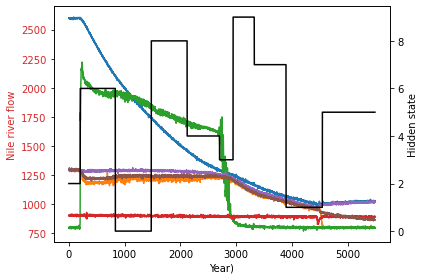

In [44]:
# Reshape the array of measurements
hmm_vals = np.reshape(np.vstack((subset)).reshape((-1,), order='F'),[len(subset[0]),len(subset)])
# fit Gaussian HMM to Q
model = GaussianHMM(n_components=10, n_iter=100).fit(hmm_vals)
# classify each observation as one of the n_states
hidden_states = model.predict(hmm_vals)
    
with open(os.path.expanduser('~/code/sandbox/python/wgta_conversion/combined/ARC06/ARC06_hidden.csv'), 'w') as out:
    writer = csv.writer(out)
    writer.writerows([hidden_states.tolist()])

plot_states(subset, hidden_states, [*range(0, len(hmm_vals))])